# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [13]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [14]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length']= df["title"].apply(len)
print(df['title_length'])

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64


In [15]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]

print(moda,mediana,media)

12 14.0 15.481103166496425


In [16]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango=df['title_length'].max() - df['title_length'].min()
varianza=df['title_length'].var()
desvi=df['title_length'].std()

print(rango,varianza,desvi)

67 72.1067488840288 8.491569282766807


In [17]:
# Calcula asimetría y curtosis de la columna 'title_length'
asi= skew(df['title_length'])
kur= kurtosis(df['title_length'])

print(asi,kur)

1.5229143965677572 3.7867237597626007


In [18]:
# Imprime el título más corto y el título más largo según su longitud
corto = df.loc[df['title_length'].idxmin(),"title"]
print(corto)
largo=df.loc[df['title_length'].idxmax(),"title"]
print(largo)

M
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


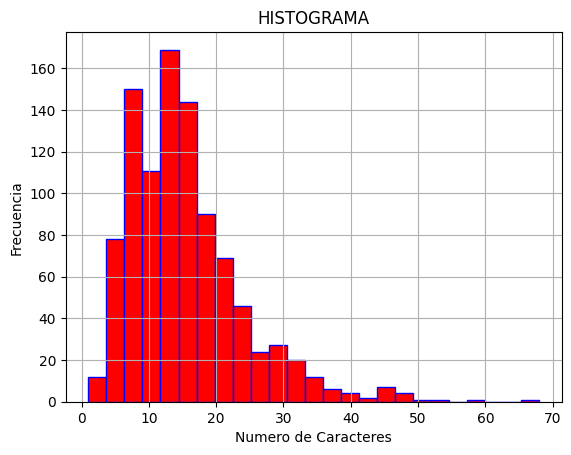

In [19]:
# grafica tus resultados
plt.Figure(figsize=(10,5))
plt.hist(df['title_length'], bins= 25, color="r", edgecolor="b")
plt.title("HISTOGRAMA")
plt.xlabel("Numero de Caracteres")
plt.ylabel("Frecuencia")
plt.grid()

plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [20]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista = df['title_length'].head(5).tolist()


In [21]:
# Calcula la media de los 5 valor.
media=sum(lista)/len(lista)
print(media)




17.2


In [26]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencia=sum((x-media)**2 for x in lista)
print(diferencia)

118.80000000000001


In [27]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varian= diferencia/len(lista)
des = varian ** 0.5

print(varian)
print(des)


23.76
4.874423042781577
